## tss, cisa value

In [58]:
import pandas as pd
import numpy as np

tss_train = np.load(input_path+'tss_train.npz')['arr_0']
tss_test = np.load(input_path+'tss_test.npz')['arr_0']
tss_val = np.load(input_path+'tss_val.npz')['arr_0']
cisa_train = np.load(input_path+'cisa_train.npz')['arr_0']
cisa_test = np.load(input_path+'cisa_test.npz')['arr_0']
cisa_val = np.load(input_path+'cisa_val.npz')['arr_0']


print(f'tss_train  mean: {np.mean(tss_train):.3f}, max: {np.max(tss_train):.2f}, min: {np.min(tss_train)}')
print(f'cisa_train  mean: {np.mean(cisa_train):.2f}, max: {np.max(cisa_train):.2f}, min: {np.min(cisa_train)}')
np.sum(tss_train==0)

tss_train  mean: 0.10152053087949753, max: 1.5700000524520874, min: 0.0
cisa_train  mean: 4.143388271331787, max: 7.0, min: 0.0


8703

In [69]:
len(cisa[cisa!=0])/len(cisa)*100, len(cisa)

(64.4265845873233, 17544)

event segments(cisa=!0): 11303/17544 (64.4265845873233%)


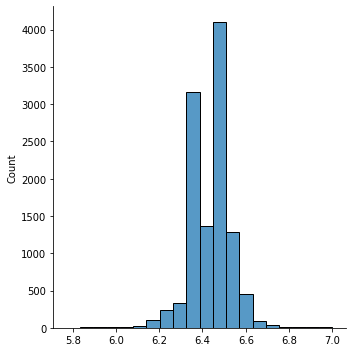

In [86]:
import seaborn as sns

# cisa = 7 - rftn/8
cisa = np.concatenate((cisa_train, cisa_val, cisa_test), axis=0)
cisa_nz = cisa[cisa!=0]

print(f'event segments(cisa=!0): {len(cisa[cisa!=0])}/{len(cisa)} ({len(cisa[cisa!=0])/len(cisa)*100}%)')

sns.displot(cisa_nz, bins=20)

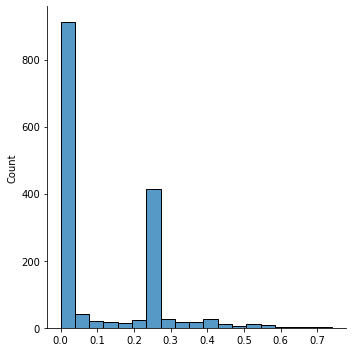

In [72]:
sns.displot(tss_val)

event segments(tss=!0): 6839/17544 (38.98198814409485%)


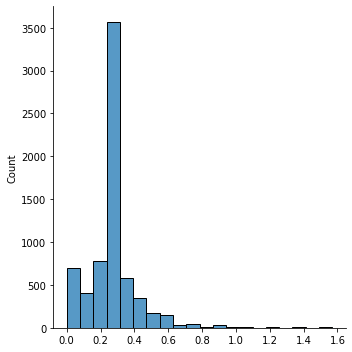

In [85]:
import seaborn as sns

# tss = 1.57 - rftn/3
tss = np.concatenate((tss_train, tss_val, tss_test), axis=0)
tss_nz = tss[tss!=0]

print(f'event segments(tss=!0): {len(tss[tss!=0])}/{len(tss)} ({len(tss[tss!=0])/len(tss)*100}%)')

sns.displot(tss_nz, bins=20)

<AxesSubplot:ylabel='Count'>

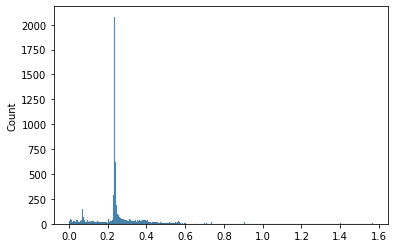

In [78]:
sns.histplot(tss_nz)

# df_preprocess

In [87]:
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))

# 전처리 통과 비율 출력
ne_pass, e_pass = 0, 0

for _, row in df_preprocess.iterrows():   
    for i in range(n_aug):
        if row[str(i+1)][0]:
            ne_pass = ne_pass + 1

    for i in range(n_aug, n_aug+n_aug2):
        if row[str(i+1)][0]:
            e_pass = e_pass + 1

print(f'non-event seg pass: {ne_pass/n_aug/2684*100:.2f}%, event seg pass: {e_pass/n_aug2/2684*100:.2f}%')
print(f'passed segments : {ne_pass+e_pass}')

non-event seg pass: 46.51%, event seg pass: 39.16%
passed segments : 17802


In [88]:
df_preprocess

,caseid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,age,gender
0,5974,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.03846153846153...","[True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.0341666...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.07766674...","[True, [0.0, 0.0, 0.0], [0.038461538461538464,...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.17106674...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.21976660...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.26688328...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.31273339...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.35754997...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.40108329...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.44484844...",49.0,F
1,801,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.03225806451612903,...","[False, [0.0, 0.0, 0.0], [0.03225806451612903,...","[False, [0.0, 0.0, 0.0], [0.09375, 0.892857142...","[False, [0.0, 0.0, 0.0], [0.23333333333333334,...","[False, [0.0, 0.0, 0.0], [0.3103448275862069, ...","[False, [0.0, 0.0, 0.0], [0.06451612903225806,...","[False, [0.0, 0.0, 0.0], [0.0, 0.2916666666666...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.05892434...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.09669445...","[False, [0.0, 0.0, 0.0], [0.15384615384615385,...","[False, [0.0, 0.0, 0.0], [0.24, 0.296296296296...",62.0,F
2,2790,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.2393665...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2391282...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2395554...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.24490474...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.25905552...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.27888876...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.30361118...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.33833335...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.36210003...","[True, [0.0, 0.0, 0.0], [0.0, 0.09523809523809...","[True, [0.0, 0.0, 0.0], [0.0, 0.09523809523809...",60.0,F
3,1413,"[True, [0.0, 0.0, 0.0], [0.0, 0.05], 0, 0]","[True, [0.0, 0.0, 0.0], [0.05, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.047619047619047616,...","[False, [0.0, 0.0, 0.0], [0.0, 0.1], 0, 0]","[False, [0.0, 0.0, 0.0], [0.0, 0.2], 0, 0]","[False, [0.0, 0.0, 0.0], [0.18181818181818182,...","[False, [0.0, 0.0, 0.0], [0.5, 0.1739130434782...","[False, [0.0, 0.0, 0.0], [0.42857142857142855,...","[False, [0.0, 0.0, 0.0], [0.5882352941176471, ...","(False, [0.0, 0.0, 0.0], [-2, -2])","(False, [0.0, 0.0, 0.0], [-2, -2])","[False, [0.0, 0.0, 0.0], [1.0, 0.0476190476190...","(False, [0.0, 0.0, 0.0], [-2, -2])","(False, [0.0, 0.0, 0.0], [-2, -2])","[False, [0.0, 0.0, 0.0], [1.0, 0.05], 0, 6.374...","[False, [0.0, 0.0, 0.0], [1.0, 0.0], 0, 6.3747...",48.0,M
4,4057,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0625, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37558...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37552...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37550...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37545...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37535...","[True, [0.0, 0.0, 0.0], [0.058823529411764705,...","[True, [0.0, 0.0, 0.0], [0.058823529411764705,...","[False, [0.0, 0.0, 0.0], [0.058823529411764705...","[True, [0.0, 0.0, 0.0], [0.0, 0.05882352941176...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37508...","[True, [0.0, 0.0

In [94]:
f_pass = 0
b_pass = 0
for _, row in df_preprocess.iterrows():   
    for i in range(n_aug, n_aug+5):
        if row[str(i+1)][0]:
            f_pass = f_pass + 1
    for i in range(n_aug+5,n_aug+n_aug2):
        if row[str(i+1)][0]:
            b_pass = b_pass + 1        
            
print(f'event seg of first 60s passed: {f_pass/n_aug/2684*100:.2f}%')
print(f'event seg of last 60s passed: {b_pass/6/2684*100:.2f}%')

event seg of first 60s passed: 38.85%
event seg of last 60s passed: 39.42%


In [102]:
import os

def get_dir_size(path='.'):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            elif entry.is_dir():
                total += get_dir_size(entry.path)
    return total

get_dir_size('../DL_model/randomSearch/TSS')/1024/1024/1024


hdf5, json

1.1855040406808257